In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from datasplit import Data_split


parches=np.zeros((374400, 32, 32)) #ejemplo de stack de parches

In [2]:
division_te= Data_split(parches=parches, seed=20)
division_te.init_etiquetas()
intervalo_temporal_te = division_te.intervalo_temporal(porc_intervalo=0.04, verbose=True)
idx_random_te         = division_te.muestra_temporal(porc_muestra=0.08, verbose=True)
tiempos_extraer_te    = division_te.extraccion_temporal(verbose=True)
idx_cuadrantes_te     = division_te.muestra_espacial(verbose=True)
idx_mantener_te       = division_te.extraccion_espacial(verbose=True)
treino_te, testeo     = division_te.extraccion_final(porc_muestra=0.05, verbose=True)

 374400 etiquetas espaciales y temporales creadas correctamente
Proceso 1: Extracción intervalo temporal
Cantidad de tiempos extraidos:  96
Cantidad de tiempos restantes:  2304
------------------------------------------------------------
Proceso 2: Extracción muestra temporal
Cantidad de tiempos extraidos:  192
Cantidad de tiempos restantes:  2112
------------------------------------------------------------
Proceso 3: Exclusión de parches dado etiquetado temporal
Cantidad de tiempos extraídos totales:  288
Cantidad de parches original:  374400
Cantidad de parches extraídos:  44928
Cantidad de parches restantes:  329472
------------------------------------------------------------
Proceso 4: Extracción de cuadrantes
Cantidad de cuadrantes extraidos:  7
Cantidad de cuadrantes restantes:  149
------------------------------------------------------------
Proceso 5: Exclusión de parches dado etiquetado cuadrante.
Cantidad de parches extraídos:  16800
Cantidad de parches posterior extracción e

In [3]:
division_va=Data_split(parches=parches,indices=treino_te, seed=20)
division_va.init_etiquetas()
intervalo_temporal_va = division_va.intervalo_temporal(porc_intervalo=0.04, indices= tiempos_extraer_te, verbose=True )
idx_random_va         = division_va.muestra_temporal(porc_muestra=0.08, verbose=True)
tiempos_extraer_va    = division_va.extraccion_temporal(verbose=True)
idx_cuadrantes_va     = division_va.muestra_espacial(indices=idx_cuadrantes_te, verbose=True)
idx_mantener_va       = division_va.extraccion_espacial(verbose=True)
treino, validacion = division_va.extraccion_final( porc_muestra=0.08, verbose=True)

 298953 etiquetas espaciales y temporales creadas correctamente
Proceso 1: Extracción intervalo temporal
Cantidad de tiempos extraidos:  96
Cantidad de tiempos restantes:  2016
------------------------------------------------------------
Proceso 2: Extracción muestra temporal
Cantidad de tiempos extraidos:  192
Cantidad de tiempos restantes:  1824
------------------------------------------------------------
Proceso 3: Exclusión de parches dado etiquetado temporal
Cantidad de tiempos extraídos totales:  288
Cantidad de parches original:  298953
Cantidad de parches extraídos:  40706
Cantidad de parches restantes:  258247
------------------------------------------------------------
Proceso 4: Extracción de cuadrantes
Cantidad de cuadrantes extraidos:  7
Cantidad de cuadrantes restantes:  142
------------------------------------------------------------
Proceso 5: Exclusión de parches dado etiquetado cuadrante.
Cantidad de parches extraídos:  14060
Cantidad de parches posterior extracción e

In [10]:
from collections import Counter 
treino.sort() 

def calcular_frecuencias(etiquetas_cuad_testeo, indices, idx_cuadrantes):

    cuadrantes= [ int(etiquetas_cuad_testeo[idx][1][0]) for idx in indices]
    counter_cuad= Counter(cuadrantes)
    freq_cuadrantes= list(counter_cuad.items())

    
    for cuad in idx_cuadrantes:
        freq_cuadrantes.append( [cuad,0])

    freq_cuadrantes=  sorted(freq_cuadrantes, key=lambda x: x[0])
    return freq_cuadrantes, counter_cuad

freq_cuadrantes, counter_cuad = calcular_frecuencias(etiquetas_cuad_testeo=division_te.etiquetas_cuadrantes,
                                                     indices=treino,
                                                     idx_cuadrantes=idx_cuadrantes_va+idx_cuadrantes_te
                                                     )
print("Cantidad de cuadrantes: ", len(freq_cuadrantes))

Cantidad de cuadrantes:  156


In [11]:
def grafico_espacial(freq_cuad, counter_cuad): 


    data = np.random.random((12, 13))
    for idx in freq_cuad:
        fila = idx[0] // data.shape[1]
        columna = idx[0] % data.shape[1]
        data[fila,columna] = idx[1]


    #Etiquetas
    xlabs=[]; ylabs=[]
    for i in range(13):
        xlabs.append(str(i))

    for j in range(12):
        ylabs.append(str(j))

         
    #Mapa de calor
    fig, ax = plt.subplots(figsize=(18, 8))
    im = ax.imshow(data)

    
    ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
    ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)
    ax.set_title("Parches por cuadrante del conjunto de entrenamiento", fontsize=10)


    for i in range(len(ylabs)  ):
        for j in range(len(xlabs)  ):
                text = ax.text(j, i, int(data[i, j]),
                          ha = "center", va = "center", color = "w", fontsize=8)
        
    #Agregar la leyenda
    cbar = ax.figure.colorbar(im, ax = ax)
    cbar.ax.set_ylabel("Frecuencias", rotation = -90, va = "top")
    vmax=counter_cuad.most_common()[1][1]
    vmin=counter_cuad.most_common()[-1][1]
    im.set_clim(vmin,vmax)

    plt.show() 

In [15]:
len(testeo)

75447

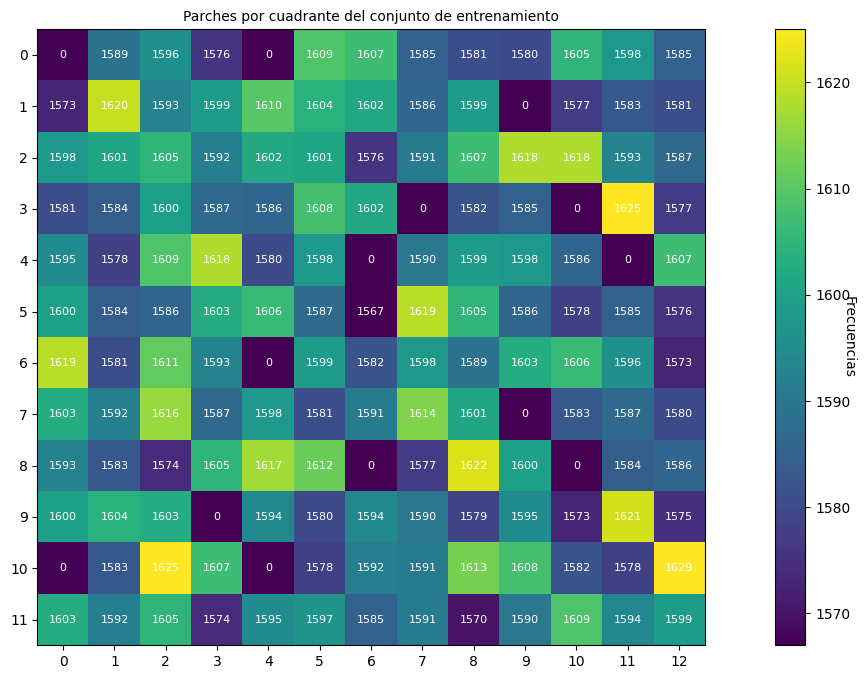

In [12]:
grafico_espacial(freq_cuadrantes, counter_cuad)